In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
extracted_data_folder_path = '/content/drive/MyDrive/data/Capstone/image'
import os

category_name_map = {
  "watercraft": "04530566",
  "rifle": "04090263",
  "display": "03211117",
  "lamp": "03636649",
  "speaker": "03691459",
  "cabinet": "02933112",
  "chair": "03001627",
  "bench": "02828884",
  "car": "02958343",
  "airplane": "02691156",
  "sofa": "04256520",
  "table": "04379243",
  "phone": "04401088"
}
id_to_name = {v: k for k, v in category_name_map.items()}
category_counts = {}

for category_id in os.listdir(extracted_data_folder_path) :
  category_path = os.path.join(extracted_data_folder_path, category_id)
  if os.path.isdir(category_path) :
    num_objects = len(os.listdir(category_path))
    category_name = id_to_name.get(category_id, category_id)
    category_counts[category_name] = num_objects

for category, count in category_counts.items():
    print(f"Category {category}: {count} objects")


Category watercraft: 1873 objects
Category car: 3514 objects
Category airplane: 4045 objects
Category table: 8436 objects
Category lamp: 2318 objects
Category speaker: 1597 objects
Category cabinet: 1571 objects
Category display: 1093 objects
Category rifle: 2373 objects
Category phone: 1089 objects
Category bench: 1813 objects
Category chair: 6778 objects
Category sofa: 3173 objects


In [ ]:
category_counts

{'watercraft': 1873,
 'car': 3514,
 'airplane': 4045,
 'table': 8436,
 'lamp': 2318,
 'speaker': 1597,
 'cabinet': 1571,
 'display': 1093,
 'rifle': 2373,
 'phone': 1089,
 'bench': 1813,
 'chair': 6778,
 'sofa': 3173}

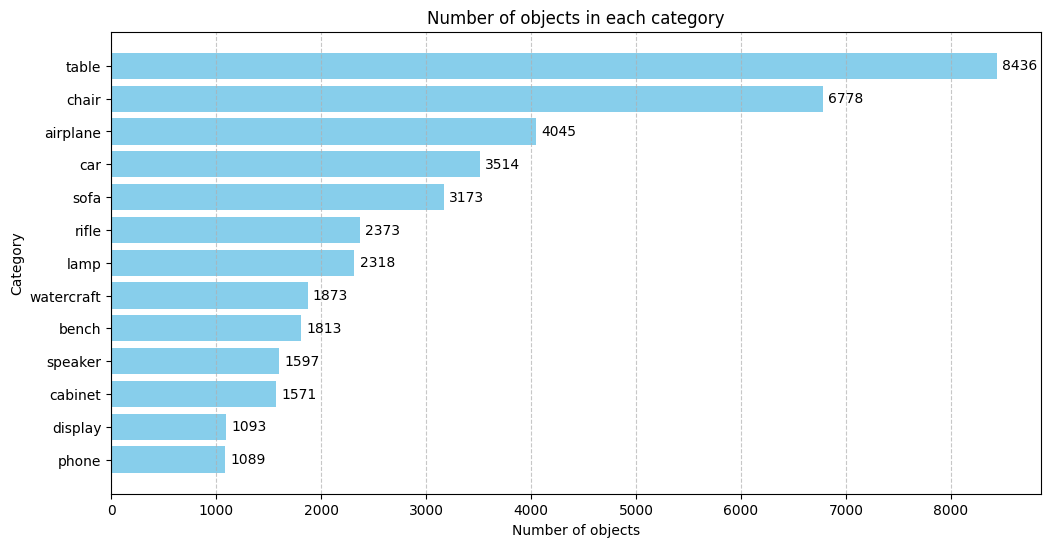

In [ ]:
import matplotlib.pyplot as plt

sorted_categories = sorted(category_counts.items(), key=lambda x: x[1])

categories, counts = zip(*sorted_categories)

plt.figure(figsize=(12, 6))
plt.barh(categories, counts, color='skyblue')

plt.xlabel("Number of objects")
plt.ylabel("Category")
plt.title("Number of objects in each category")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(counts):
    plt.text(value + 50, index, str(value), va='center')

plt.show()


Dataset needs to be downsampled

In [ ]:
import random
import shutil
from tqdm import tqdm

new_dataset_path = '/content/drive/MyDrive/data/Capstone/image_final'

os.makedirs(new_dataset_path, exist_ok=True)

# Giới hạn số lượng tối đa per category
MAX_SAMPLES = 3000

for category_id in os.listdir(extracted_data_folder_path):
    category_path = os.path.join(extracted_data_folder_path, category_id)

    if os.path.isdir(category_path):
        # Lấy danh sách các file trong thư mục
        all_objects = os.listdir(category_path)

        # Random chọn tối đa MAX_SAMPLES object
        sampled_objects = random.sample(all_objects, min(len(all_objects), MAX_SAMPLES))

        # Tạo thư mục mới cho category này
        new_category_path = os.path.join(new_dataset_path, category_id)
        os.makedirs(new_category_path, exist_ok=True)

        # Copy folder vào thư mục mới
        for obj in tqdm(sampled_objects, desc=f"Copying {category_id}", leave=False):
            src = os.path.join(category_path, obj)
            dst = os.path.join(new_category_path, obj)
            shutil.copytree(src, dst)

        print(f"Processed {len(sampled_objects)} objects for category {id_to_name.get(category_id, category_id)}")

print("✅ Dataset filtering completed and saved to:", new_dataset_path)

Copying 04530566:  72%|███████▏  | 1352/1873 [6:59:48<2:30:57, 17.38s/it]

In [ ]:
import os
import zipfile

shapenet_core_path = '/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048.zip'
destination_path = '/content/drive/MyDrive/data/Capstone'

os.makedirs(extracted_data_folder_path, exist_ok=True)

with zipfile.ZipFile(shapenet_core_path, 'r') as zip_ref :
  zip_ref.extractall(destination_path)



NameError: name 'extracted_data_folder_path' is not defined

In [ ]:
import os

extracted_shapenet_core_path = '/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled'
file_count = 0

if os.path.exists(os.path.join(extracted_shapenet_core_path)):
  file_count = len([f for f in os.listdir(extracted_shapenet_core_path) if os.path.isfile(os.path.join(extracted_shapenet_core_path, f))])
  print(f"Number of files in {extracted_shapenet_core_path}: {file_count}")
else:
  print(f"Directory not found: {extracted_shapenet_core_path}")


Number of files in /content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled: 60


# Main

## Logger

In [ ]:
import logging
from logging.handlers import RotatingFileHandler
from pathlib import Path
import sys

logger = logging.getLogger(__name__)
# the logger with handler will use higher one level (!important)
logger.setLevel(logging.DEBUG)


def console_logger():
    console_handler = logging.StreamHandler(sys.stderr)
    console_format = logging.Formatter(
        fmt='%(asctime)s: %(message)s',
        datefmt='%m-%d %H:%M:%S'
    )
    console_handler.setFormatter(console_format)
    console_handler.setLevel(logging.DEBUG)
    logger.addHandler(console_handler)


def file_logger():
    log_path = Path('./logs/app.log')
    log_path.parent.mkdir(parents=True, exist_ok=True)
    file_handler = RotatingFileHandler(log_path, maxBytes=1 * 10 ** 6, backupCount=10, encoding='UTF-8', delay=False)
    file_format = logging.Formatter(
        fmt='%(asctime)s %(levelname)s: %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S'
    )
    file_handler.setFormatter(file_format)
    file_handler.setLevel(logging.DEBUG)
    logger.addHandler(file_handler)

## Data Loader

In [2]:
!pip install kmeans logger kmeans-pytorch

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kmeans: filename=kmeans-1.0.2-cp311-cp311-linux_x86_64.whl size=12524 sha256=c5c58b3ab14ff300b4314918cf5098601c064a5ee47ff2eb28379bf0057695b2
  Stored in directory: /root/.cache/pip/wheels/46/73/c1/99a115afb9caa9d3fa04a35509d96d075f18944cbf2b7bdf9b
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1759 sha256=afe12eff154906aeef1e3101f87356b5deb609b79b3ba920842acc54b4283cb3
  Stored in directory: /root/.cache/pip/wheels/cd/1d/c8/f1361043ff09fd3c9a747b199e8e37bd716bacf0843bbdb68f
Successfully built kmeans logger


In [1]:
from torch.utils.data import Dataset
from tqdm import tqdm
from pathlib import Path
import numpy as np
import json
import h5py
from PIL import Image
from kmeans_pytorch import kmeans
import torch
import cv2
import random
import gc

# from lib.logger import logger

class ShapenetDataset(Dataset):
    def __init__(self, dataset_path, snapshot_path, transforms=None,
                 only: list = None, mode: str = 'easy', remake: bool = True, shuffle: bool = True, seed: int = None):
        self.dataset_path = dataset_path
        self.snapshot_path = snapshot_path
        self.transforms = transforms
        self.only = only
        self.mode = mode
        self.shuffle = shuffle
        self.seed = seed
        self.remake = remake
        self.length = 0

        print(f"Dataset path: {self.dataset_path}")
        self.data_type = self.dataset_path.stem.split("_files")[0]

        self.h5_files = {}
        self.index_map = []

        for key, value in enumerate(self.only):
            if self.check_final_h5(value) is True and remake is False:
                print(f"Opening HDF5 file for {value}...")
                # source_name, source_file, source_points, \
                #     image_path, gt_points, image = self.read_final_h5(value)
                h5_file = self.read_final_h5(value)
                self.h5_files[value] = h5_file
                num_samples = len(h5_file["image"])
                self.index_map.extend(
                    [(value, i)
                    for i in range(num_samples)
                ])
                self.length = len(self.index_map)

            else:
                source_name, source_file, source_points = self.read_dataset([value])
                image_path, gt_points, length = self.convert2realpath(source_file)

                image = self.open_image(image_path)

                # image = []
                # for batch in self.open_image(image_path):
                #     image.extend(batch)

                source_points = self.points_normalization(source_points)
                # source_points = self.points_classification(source_points)

                self.save_final_h5(value, source_name, source_file, source_points, image_path, gt_points, image)
                del source_name, source_file, source_points, image_path, gt_points, image
                gc.collect()
                h5_file = self.read_final_h5(value)
                self.h5_files[value] = h5_file
                num_samples = len(h5_file["image"])
                self.index_map.extend(
                    [(value, i)
                    for i in range(num_samples)
                ])
                self.length = len(self.index_map)

                # if key == 0:
                #     self.source_name = source_name
                #     self.source_file = source_file
                #     self.source_points = source_points
                #     self.image_path = image_path
                #     self.gt_points = gt_points
                #     self.length = len(image_path)
                #     self.image = image
                # else:
                #     self.source_name = np.concatenate((self.source_name, source_name), 0)
                #     self.source_file = np.concatenate((self.source_file, source_file), 0)
                #     self.source_points = np.concatenate((self.source_points, source_points), 0)
                #     self.image_path = np.concatenate((self.image_path, image_path), 0)
                #     self.gt_points = np.concatenate((self.gt_points, gt_points), 0)
                #     self.length = self.length + len(image_path)
                #     self.image = np.concatenate((self.image, image), 0)

                # if self.length == 0:
                #     raise Exception('no data found')
                # logger.debug(f'Dataset Type: {self.data_type}, Point Model: {len(self.source_points)}, Images: {self.length}')

        # shuffle items because can't use data loader shuffle
        if self.shuffle:
          rng = random.Random(self.seed) if self.seed is not None else random
          rng.shuffle(self.index_map)

    def check_final_h5(self, filename):
        h5_name = f'shapenet_{filename}_{self.data_type}_{self.mode}.h5'
        h5_path = self.snapshot_path.parent.joinpath('h5_v2')
        # h5_path = self.snapshot_path.parent.joinpath('h5')
        h5_path.mkdir(parents=True, exist_ok=True)
        return h5_path.joinpath(f'{h5_name}').exists()

    def read_final_h5(self, filename):
        # h5_name = f'shapenet_{filename}_{self.data_type}_{self.mode}.h5'
        # h5_path = self.snapshot_path.parent.joinpath(f'h5/{h5_name}')
        # with h5py.File(h5_path, 'r') as f:
        #     return [
        #         f['source_name'][:], f['source_file'][:], f['source_points'][:],
        #         f['image_path'][:], f['gt_points'][:],
        #         f['image'][:]
        #     ]
        h5_name = f'shapenet_{filename}_{self.data_type}_{self.mode}.h5'
        # h5_path = self.snapshot_path.parent.joinpath(f'h5/{h5_name}')
        h5_path = self.snapshot_path.parent.joinpath(f'h5_v2/{h5_name}')
        return h5py.File(h5_path, 'r', swmr=True, libver='latest')

    def save_final_h5(self, filename, source_name, source_file, source_points, image_path, gt_points, image):
        h5_name = f'shapenet_{filename}_{self.data_type}_{self.mode}.h5'
        h5_path = self.snapshot_path.parent.joinpath(f'h5_v2/{h5_name}')
        with h5py.File(h5_path, 'w') as f:
            f.create_dataset('source_name', data=source_name.tolist())
            f.create_dataset('source_file', data=source_file.tolist())
            f.create_dataset('source_points', data=source_points)
            f.create_dataset('image_path', data=image_path.tolist())
            f.create_dataset('gt_points', data=gt_points)
            f.create_dataset('image', data=image)
            # f.create_dataset('image_processed', data=image)

    def read_dataset(self, only):
        all_name, all_file, all_gt_points = np.empty([0]), np.empty([0]), np.empty([0, 2048, 3], dtype=np.float32)
        with open(self.dataset_path, 'r') as f:
            files = f.readlines()
            np_files = np.char.split(files, sep='\n')
        read_bar = tqdm(np_files, unit='file', leave=True, colour='#DA7E7E')
        for key, value in enumerate(read_bar):
            index = value[0].split('.')[0]
            prefix_path = Path(self.dataset_path).parent.parent.joinpath(f"{Path(index).parent.name}")
            name_json = prefix_path.joinpath(f"{Path(index).name}_id2name.json")
            file_json = prefix_path.joinpath(f"{Path(index).name}_id2file.json")
            h5 = prefix_path.joinpath(f"{Path(index).name}.h5")

            with open(name_json) as f:
                name = np.array(json.load(f))

            if only is not None:
                target_cls = np.isin(name, only)
            else:
                target_cls = tuple()

            name = name[target_cls]

            with open(file_json) as f:
                file = np.array(json.load(f))[target_cls]

            with h5py.File(h5, 'r') as f:
                h5_data = f['data'][:][target_cls]

            read_bar.set_description(f'Read Dataset (File) ({only}) [{key + 1}/{len(np_files)}]')
            read_bar.set_postfix_str(f'Count: {len(name)}')

            all_name = np.concatenate((all_name, name), 0)
            all_file = np.concatenate((all_file, file), 0)
            all_gt_points = np.concatenate((all_gt_points, h5_data), 0)
        return all_name, all_file, all_gt_points

    def points_normalization(self, source_points):
        size = source_points.shape[0]
        n_points = torch.from_numpy(source_points).view(size, -1)
        n_points = n_points - n_points.min(1, keepdim=True)[0]
        n_points = n_points / n_points.max(1, keepdim=True)[0]
        n_points = n_points.view(size, -1, 3)
        return n_points.numpy()

    def points_classification(self, source_points):
        cluster = torch.empty([0, 2048])
        for key, value in enumerate(source_points):
            cluster_ids_x, _ = kmeans(X=torch.from_numpy(value), num_clusters=3, distance='euclidean', tol=1e-4, device='cuda')
            cluster = torch.cat((cluster, cluster_ids_x.view(1, -1)), 0)
        return torch.cat((torch.from_numpy(source_points), cluster.unsqueeze(2)), 2)

    def convert2realpath(self, source_file):
        images, points = np.empty([0]), np.empty([0], dtype=int)
        root_path = Path(self.snapshot_path)
        convert_bar = tqdm(source_file, unit='file', leave=True, colour='#DAB97E')
        for key, value in enumerate(convert_bar):
            dir_path = value.split('.npy')[0]
            current_path = str(root_path.joinpath(f'{dir_path}/{self.mode}'))
            if not Path(current_path).exists():
                continue
            image_count = min(sum(1 for element in Path(current_path).iterdir() if element.suffix == '.png'), 24)
            # only read 24 images
            scope = np.array(list(map('{:02d}.png'.format, np.arange(image_count))))
            png_files = np.char.add(f'{str(current_path)}/', scope)

            images = np.concatenate((images, png_files), 0)
            points = np.concatenate((points, np.full(png_files.shape, key, dtype=int)), 0)

            convert_bar.set_description(f'Convert Dataset (Point Model) [{key + 1}/{len(source_file)}]')
            convert_bar.set_postfix_str(f'Image Count: {image_count}')
        return images, points, len(images)

    def open_image(self, image_path):
        image = []
        open_bar = tqdm(image_path, unit='file', leave=True, colour='#DADA7E')
        for key, value in enumerate(open_bar):
            image += [Image.open(value).copy()]
            image[-1] = image[-1].convert("RGB")
            if self.transforms is not None:
                image[-1] = self.transforms(image[-1]).numpy()
                # transformed_image = self.transforms(image[-1])
                # transformed_image_np = transformed_image.numpy()
                # transformed_image = transformed_image.unsqueeze(0).to(device)
                # with torch.no_grad():
                #     depth_prediction = midas(transformed_image)
                # depth_prediction = depth_prediction.squeeze().cpu().numpy()
                # depth_prediction = (depth_prediction - depth_prediction.min()) / (depth_prediction.max() - depth_prediction.min())
                # depth_pil = Image.fromarray((depth_prediction * 255).astype(np.uint8))
                # depth_map = self.transforms(depth_pil)
                # depth_map = depth_map.numpy()

                # depth_image_2d = depth_map.squeeze()
                # image[-1] = np.concatenate((transformed_image_np, depth_image_2d[None, :, :]), axis=0)
            if image[-1].dtype == np.float32:
                image[-1] = (image[-1] * 255).astype(np.uint8)

            open_bar.set_description(f'Open Image (File) [{key + 1}/{len(image_path)}]')
        return image

    # def __getitem__(self, index):
    #     return self.image[index], self.source_points[self.gt_points[index]], index

    def __getitem__(self, index):
        file_key, item_idx = self.index_map[index]
        h5_file = self.h5_files[file_key]
        gt_points = h5_file['gt_points'][item_idx]
        image = h5_file['image_processed'][item_idx].astype(np.float32)
        source_points = h5_file['source_points']
        category_name = file_key

        if image.shape[0] != 4:
            raise ValueError(f"Expected image to have 4 channels, but got {image.shape}")
        return image, source_points[gt_points], index, category_name


    def __len__(self):
        if self.remake is False :
          return len(self.index_map)
        else :
          return self.length

In [2]:
from torchvision import transforms
def transform_config(preprocess_list, resize):
        preprocess = []
        if 'grayscale' in preprocess_list:
            preprocess += [transforms.Grayscale(1)]
        if 'resize' in preprocess_list:
            preprocess += [transforms.Resize(resize)]
        if 'totensor' in preprocess_list:
            preprocess += [transforms.ToTensor()]
        return transforms.Compose(preprocess)

In [3]:
# test if the function data loader works properly
from torch.utils.data import DataLoader
from pathlib import Path
import os

image_path = Path("/content/drive/MyDrive/data/Capstone/image")
# shapenet_path = "/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048"

train_dataset_path = Path('/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled_v3/train_files.txt')
val_dataset_path = Path('/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled_v3/val_files.txt')
test_dataset_path = Path('/content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled_v3/test_files.txt')

# preprocess = ['grayscale', 'resize', 'totensor']
preprocess = ['resize', 'totensor']

# create train Dataset
# train_dataset = ShapenetDataset(
#     dataset_path=train_dataset_path,
#     snapshot_path=image_path,
#     only=["bench", "lamp", "cabinet", "sofa", "table", "chair"],
#     mode="easy",
#     transforms=transform_config(preprocess, [128,128]),
#     remake=False,
#     shuffle=True,
#     seed=42
# )

# val_dataset = ShapenetDataset(
#     dataset_path=val_dataset_path,
#     snapshot_path=image_path,
#     only=["bench", "lamp", "cabinet", "sofa", "table", "chair"],
#     mode="easy",
#     transforms=transform_config(preprocess, [128,128]),
#     remake=False,
#     shuffle=True,
#     seed=42
# )

test_dataset = ShapenetDataset(
    dataset_path=test_dataset_path,
    snapshot_path=image_path,
    only=["bench", "lamp", "cabinet", "sofa", "table", "chair"],
    # only=["table", "chair"],
    mode="easy",
    transforms=transform_config(preprocess, [128,128]),
    remake=False,
    shuffle=True,
    seed=42
)


Dataset path: /content/drive/MyDrive/data/Capstone/shapenetcorev2_hdf5_2048_downsampled_v3/test_files.txt
Opening HDF5 file for bench...
Opening HDF5 file for lamp...
Opening HDF5 file for cabinet...
Opening HDF5 file for sofa...
Opening HDF5 file for table...
Opening HDF5 file for chair...


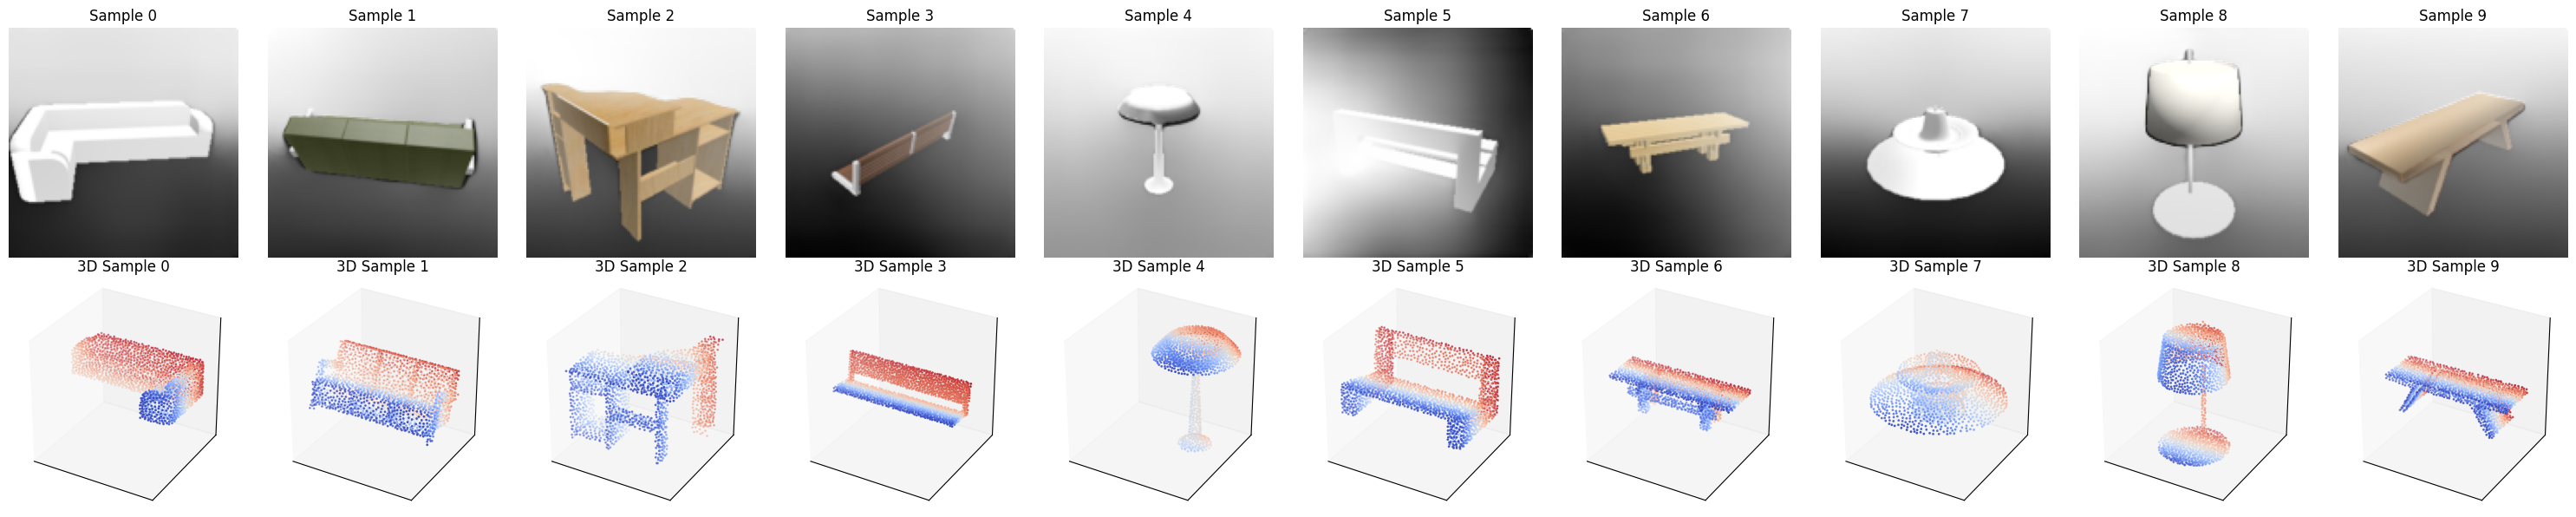

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

num_samples = 10
fig = plt.figure(figsize=(num_samples * 3, 6))

for i in range(num_samples):
    # image, source_point, index = train_dataset[i]
    # image, source_point, index = val_dataset[i]
    image, source_point, index = train_dataset[i]

    # 2d image
    ax1 = fig.add_subplot(2, num_samples, i + 1)
    ax1.imshow(image.transpose(1, 2, 0), cmap='gray')
    ax1.axis("off")
    ax1.set_title(f"Sample {i}")

    # point cloud 3d
    ax2 = fig.add_subplot(2, num_samples, num_samples + i + 1, projection='3d')
    ax2.scatter(source_point[:, 0], source_point[:, 2], source_point[:, 1],
                s=1, c=source_point[:, 2], cmap='coolwarm')

    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    ax2.set_zlim([0, 1])

    ax2.set_box_aspect([1, 1, 1])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    ax2.set_title(f"3D Sample {i}")

plt.tight_layout()
plt.show()

In [ ]:
len(train_dataset)

265679

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.l

1.0
0.0


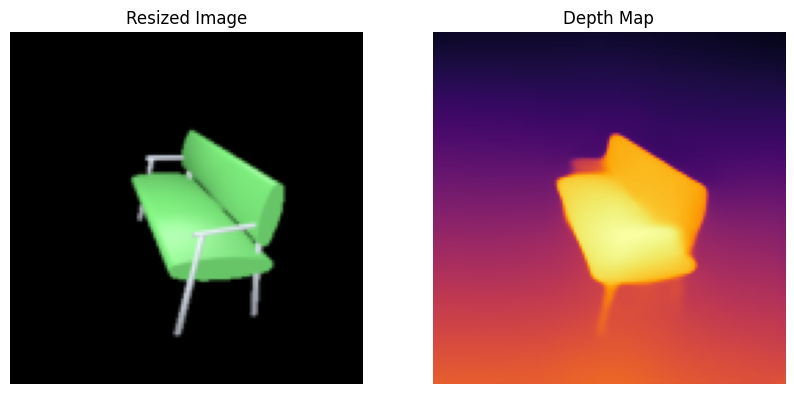

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

model_type = ["MiDaS_small", "DPT_Hybrid", "DPT_Large"]
midas = torch.hub.load("intel-isl/MiDaS", model_type[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
midas.to(device)
midas.eval()

image, gt, index = test_dataset[3]
preprocess = ['totensor', 'resize']

transform = transform_config(preprocess, [128,128])
image_uint8 = image.astype(np.uint8) if image.dtype == np.float32 else image

image_pil = Image.fromarray(image_uint8)
new_image = transform(image_pil)
new_image_np = new_image.numpy()
new_image = new_image.unsqueeze(0).to(device) # tensor

# input_tensor = midas_transform(Image.fromarray(image)).unsqueeze(0).to(device)
with torch.no_grad():
    depth_prediction = midas(new_image)
depth_prediction = depth_prediction.squeeze().cpu().numpy()
# normalize depth map
depth_prediction = (depth_prediction - depth_prediction.min()) / (depth_prediction.max() - depth_prediction.min())
depth_pil = Image.fromarray((depth_prediction * 255).astype(np.uint8))
depth_image = transform(depth_pil)
depth_image = depth_image.numpy()
print(depth_image.max())
print(depth_image.min())

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(new_image_np.transpose(1,2,0), cmap='gray')
plt.title('Resized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(depth_image.squeeze(), cmap='inferno')
plt.title('Depth Map')
plt.axis('off')

plt.show()


In [ ]:
new_image_np.max(), new_image_np.min()

(np.float32(1.0), np.float32(0.0))

In [ ]:
depth_image.max(), depth_image.min()

(np.float32(1.0), np.float32(0.0))

In [ ]:
depth_image_2d = depth_image.squeeze()
combined_image = np.concatenate((new_image_np, depth_image_2d[None, :, :]), axis=0) # (4, 128, 128)
combined_image.shape

(4, 128, 128)

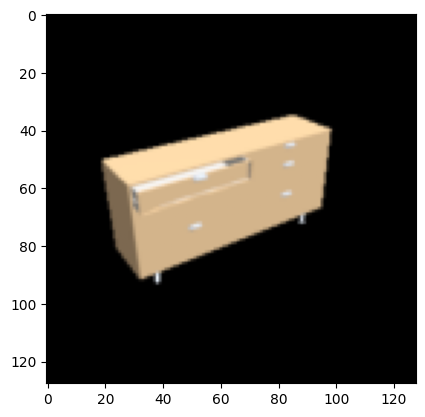

In [ ]:
import matplotlib.pyplot as plt
image, source_point, index = test_dataset[3]

plt.imshow(image.transpose(1,2,0))

In [ ]:
combined_image.shape

(3, 128, 128)

(4, 128, 128)


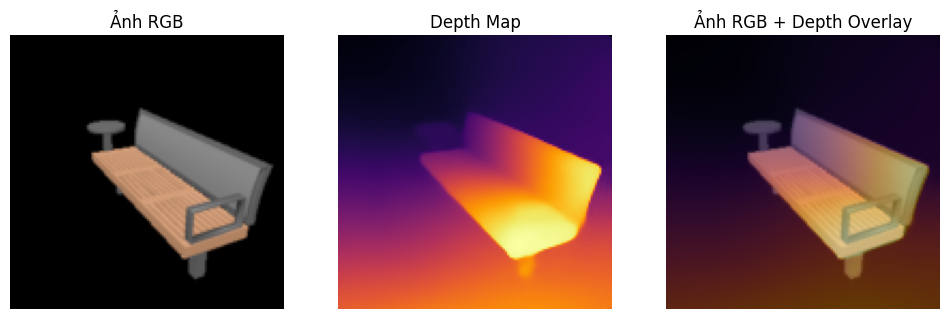

In [ ]:
import matplotlib.pyplot as plt

combined_image, source_point, index = test_dataset[1]

print(combined_image.shape)

plt.figure(figsize=(12, 6))

# Hiển thị ảnh gốc (RGB)
plt.subplot(1, 3, 1)
plt.imshow(combined_image[:3].transpose(1, 2, 0))  # Chuyển về (H, W, 3)
plt.title("Ảnh RGB")
plt.axis("off")

# Hiển thị Depth Map
plt.subplot(1, 3, 2)
plt.imshow(combined_image[3], cmap="inferno")  # Depth map kênh thứ 4
plt.title("Depth Map")
plt.axis("off")

# Hiển thị ảnh kết hợp (RGB + Depth map overlay)
plt.subplot(1, 3, 3)
depth_colored = plt.cm.inferno(combined_image[3])[:, :, :3]  # Ánh xạ màu từ depth map
overlay = 0.6 * combined_image[:3].transpose(1, 2, 0) + 0.4 * depth_colored  # Trộn ảnh
plt.imshow(overlay)
plt.title("Ảnh RGB + Depth Overlay")
plt.axis("off")

plt.show()


### Transform image

In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
from pathlib import Path

h5_path = Path("/content/drive/MyDrive/data/Capstone/h5")
test_files = [file for file in os.listdir(h5_path) if "test" in file and file != "shapenet_bench_test_easy.h5"]
test_files

['shapenet_lamp_test_easy.h5',
 'shapenet_cabinet_test_easy.h5',
 'shapenet_sofa_test_easy.h5',
 'shapenet_table_test_easy.h5',
 'shapenet_chair_test_easy.h5']

In [ ]:
import os
import h5py
import torch
import numpy as np
from torchvision import transforms
from tqdm.auto import tqdm
import cv2
import gc
from pathlib import Path
from PIL import Image
import logging

h5_path = Path("/content/drive/MyDrive/data/Capstone/h5_v2")
train_files = [file for file in os.listdir(h5_path) if "train" in file]
# train_files = ["shapenet_chair_train_easy.h5"]
val_files = [file for file in os.listdir(h5_path) if "val" in file]
test_files = [file for file in os.listdir(h5_path) if "test" in file]

# preprocess = ['grayscale', 'resize', 'totensor']
preprocess = ['resize', 'totensor']

# load pretrained depth esimator model
model_type = ["MiDaS_small", "DPT_Hybrid", "DPT_Large"]
midas = torch.hub.load("intel-isl/MiDaS", model_type[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
midas.to(device)
midas.eval()

test_image = None

def transform_config(preprocess_list, resize):
        preprocess = []
        if 'grayscale' in preprocess_list:
            preprocess += [transforms.Grayscale(1)]
        if 'resize' in preprocess_list:
            preprocess += [transforms.Resize(resize)]
        if 'totensor' in preprocess_list:
            preprocess += [transforms.ToTensor()]
        return transforms.Compose(preprocess)

transform = transform_config(preprocess, [128,128])

def transform_images_h5(list_files) :
    for file_name in tqdm(list_files, desc="📂 Processing HDF5 files") :
        file_path = os.path.join(h5_path, file_name)
        with h5py.File(file_path, 'a') as h5_file :
            images = h5_file["image"]
            num_images = images.shape[0]

            if "image_processed" in h5_file:
                del h5_file["image_processed"]
            h5_file.create_dataset("image_processed", (num_images, 4, 128, 128))
            images_processed = h5_file["image_processed"]
            # position += 1
            with tqdm(total=num_images, unit="img", desc=f"📌 {file_name}", colour="green", leave=True) as open_bar:
                for idx in range(num_images):
                    global test_image
                    image = images[idx]
                    test_image = image.copy()
                    image_uint8 = image.astype(np.uint8) if image.dtype == np.float32 else image
                    if image.shape[0] in [1, 3] and len(image.shape) == 3 :
                        image_uint8 = np.transpose(image_uint8, (1,2,0))
                    image_pil = Image.fromarray(image_uint8)

                    transformed_image = transform(image_pil)
                    transformed_image_np = transformed_image.numpy()
                    transformed_image = transformed_image.unsqueeze(0).to(device) # tensor
                    with torch.no_grad():
                        depth_prediction = midas(transformed_image)
                    depth_prediction = depth_prediction.squeeze().cpu().numpy()
                    # normalize depth map
                    depth_prediction = (depth_prediction - depth_prediction.min()) / (depth_prediction.max() - depth_prediction.min())
                    depth_pil = Image.fromarray((depth_prediction * 255).astype(np.uint8))
                    depth_map = transform(depth_pil)
                    depth_map = depth_map.numpy()

                    depth_image_2d = depth_map.squeeze()
                    combined_image = np.concatenate((transformed_image_np, depth_image_2d[None, :, :]), axis = 0) # (4, 128, 128)
                    images_processed[idx] = combined_image

                    open_bar.update()

        #     # del h5_file["image"]
        #     # h5_file.move("image_resized", "image")

        del images, images_processed
        gc.collect()

# transform_images_h5(train_files)
# transform_images_h5(val_files)
transform_images_h5(test_files)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


📂 Processing HDF5 files:   0%|          | 0/6 [00:00<?, ?it/s]

📌 shapenet_bench_test_easy.h5:   0%|          | 0/4344 [00:00<?, ?img/s]

📌 shapenet_lamp_test_easy.h5:   0%|          | 0/5568 [00:00<?, ?img/s]

📌 shapenet_cabinet_test_easy.h5:   0%|          | 0/3696 [00:00<?, ?img/s]

📌 shapenet_sofa_test_easy.h5:   0%|          | 0/5760 [00:00<?, ?img/s]

📌 shapenet_table_test_easy.h5:   0%|          | 0/5760 [00:00<?, ?img/s]

📌 shapenet_chair_test_easy.h5:   0%|          | 0/5760 [00:00<?, ?img/s]

In [ ]:
from google.colab import runtime
runtime.unassign()